In [50]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [87]:
a1 = tf.Variable(tf.truncated_normal(shape = [1],mean = 0, stddev = 1))
b1 = tf.Variable(tf.truncated_normal(shape = [1],mean = 0, stddev = 1))

x = tf.placeholder(tf.float32 , shape = [1])
y_ = tf.placeholder(tf.float32 , shape = [1])

y = tf.add(tf.multiply(a1,x), b1)

train_x = np.arange(1,1000,1.0)
train_y = np.arange(1,1000,1.0)

loss = tf.losses.mean_squared_error(y, y_)
optimi = tf.train.GradientDescentOptimizer(0.001).minimize(loss)

aver = tf.train.ExponentialMovingAverage(0.999)
average_op = aver.apply(tf.trainable_variables())

with tf.control_dependencies([optimi, average_op]):
    train_op = tf.no_op()

result_v = []
result_a = []
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    result_a.append(sess.run(a1))
    step = 10000
    print(sess.run(a1))
    for i in range(step):
        x_t = train_x[i % 5]
        y_t = train_y[i % 5]
        sess.run(train_op, feed_dict = {x : [x_t], y_ : [y_t]})
        
        result_a.append(sess.run(a1))
        v1 = aver.average(a1)
        result_v.append(sess.run(v1))
        
    print(sess.run(a1),sess.run(b1))
# writer = tf.summary.FileWriter('./graph', sess.graph)

[-1.3681575]
[0.98859644] [0.04178123]


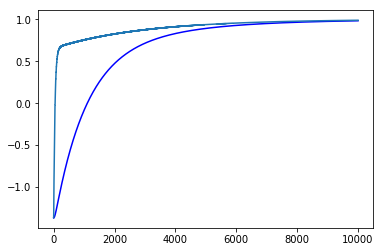

In [88]:
x = range(len(result_v))
plt.plot(x,result_v,'-',c = 'b')
plt.plot(x,result_a[1:],'-')

In [89]:
result_v

[array([-1.3681575], dtype=float32),
 array([-1.3681542], dtype=float32),
 array([-1.3681347], dtype=float32),
 array([-1.3680772], dtype=float32),
 array([-1.3679515], dtype=float32),
 array([-1.3677212], dtype=float32),
 array([-1.3674884], dtype=float32),
 array([-1.3672417], dtype=float32),
 array([-1.3669617], dtype=float32),
 array([-1.3666214], dtype=float32),
 array([-1.3661879], dtype=float32),
 array([-1.3657527], dtype=float32),
 array([-1.3653057], dtype=float32),
 array([-1.3648294], dtype=float32),
 array([-1.3642999], dtype=float32),
 array([-1.3636875], dtype=float32),
 array([-1.363074], dtype=float32),
 array([-1.3624505], dtype=float32),
 array([-1.3618015], dtype=float32),
 array([-1.3611053], dtype=float32),
 array([-1.3603354], dtype=float32),
 array([-1.3595648], dtype=float32),
 array([-1.3587859], dtype=float32),
 array([-1.3579848], dtype=float32),
 array([-1.357142], dtype=float32),
 array([-1.3562335], dtype=float32),
 array([-1.3553249], dtype=float32),
 ar

In [90]:
result_a

[array([-1.3681575], dtype=float32),
 array([-1.3648051], dtype=float32),
 array([-1.348668], dtype=float32),
 array([-1.3106123], dtype=float32),
 array([-1.2424012], dtype=float32),
 array([-1.1376125], dtype=float32),
 array([-1.1348454], dtype=float32),
 array([-1.120794], dtype=float32),
 array([-1.087203], dtype=float32),
 array([-1.0266131], dtype=float32),
 array([-0.9331846], dtype=float32),
 array([-0.93093604], dtype=float32),
 array([-0.9187332], dtype=float32),
 array([-0.88909954], dtype=float32),
 array([-0.8352654], dtype=float32),
 array([-0.75190806], dtype=float32),
 array([-0.7501188], dtype=float32),
 array([-0.73955405], dtype=float32),
 array([-0.7134281], dtype=float32),
 array([-0.6655827], dtype=float32),
 array([-0.5911536], dtype=float32),
 array([-0.5897711], dtype=float32),
 array([-0.580658], dtype=float32),
 array([-0.55764115], dtype=float32),
 array([-0.51510465], dtype=float32),
 array([-0.4485908], dtype=float32),
 array([-0.44756848], dtype=float32)

In [91]:
ans = []
for i, v_i in enumerate(result_v):
    ans.append(result_v[i] * 0.999 + 0.001 * result_a[i + 1])

In [92]:
ans[:10]

[array([-1.3681542], dtype=float32),
 array([-1.3681346], dtype=float32),
 array([-1.3680772], dtype=float32),
 array([-1.3679515], dtype=float32),
 array([-1.3677212], dtype=float32),
 array([-1.3674884], dtype=float32),
 array([-1.3672417], dtype=float32),
 array([-1.3669617], dtype=float32),
 array([-1.3666214], dtype=float32),
 array([-1.3661879], dtype=float32)]

In [93]:
result_v[1:11]

[array([-1.3681542], dtype=float32),
 array([-1.3681347], dtype=float32),
 array([-1.3680772], dtype=float32),
 array([-1.3679515], dtype=float32),
 array([-1.3677212], dtype=float32),
 array([-1.3674884], dtype=float32),
 array([-1.3672417], dtype=float32),
 array([-1.3669617], dtype=float32),
 array([-1.3666214], dtype=float32),
 array([-1.3661879], dtype=float32)]